In [1]:
from nsga import NSGA
from moga import MOGA
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Carga del grafo
graph = nx.read_graphml("data/amazon_graph.graphml")

# Renombramos los nodos al rango [0, N]
mapping = {node: i for i, node in enumerate(graph.nodes())}
graph = nx.relabel_nodes(graph, mapping)


## NSGA

### Execute algorithm

Generación 0


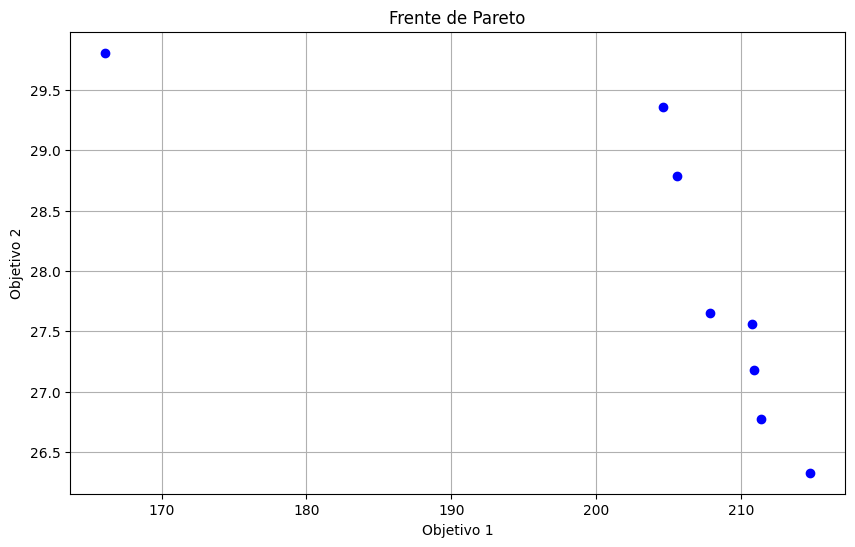

In [3]:
es = NSGA(graph, N=80, init=0.4, pcross=0.6, pmut=0.4, n_iter=625, fitness_metrics=0, n_tour=2, crossover_op=2, show_plot=624)
pop, old_fitness, pareto = es.evolve()

In [ ]:
# Save results with pickle
with open('data\\nsga_results\\pop_list.pkl', 'wb') as file_pop:
    pickle.dump(pop, file_pop)

with open('data\\nsga_results\\fitness_list.pkl', 'wb') as file_fitness:
    pickle.dump(old_fitness, file_fitness)

with open('data\\nsga_results\\pareto_list.pkl', 'wb') as file_pareto:
    pickle.dump(pareto, file_pareto)

### Retrieve saved data

In [ ]:
# Read results with pickle
with open('data\\nsga_results\\pop_list.pkl', 'rb') as file_pop:
    pop = pickle.load(file_pop)

with open('data\\nsga_results\\fitness_list.pkl', 'rb') as file_fitness:
    old_fitness = pickle.load(file_fitness)

with open('data\\nsga_results\\pareto_list.pkl', 'rb') as file_pareto:
    pareto = pickle.load(file_pareto)

## MOGA

### Execute algorithm

Generación 0


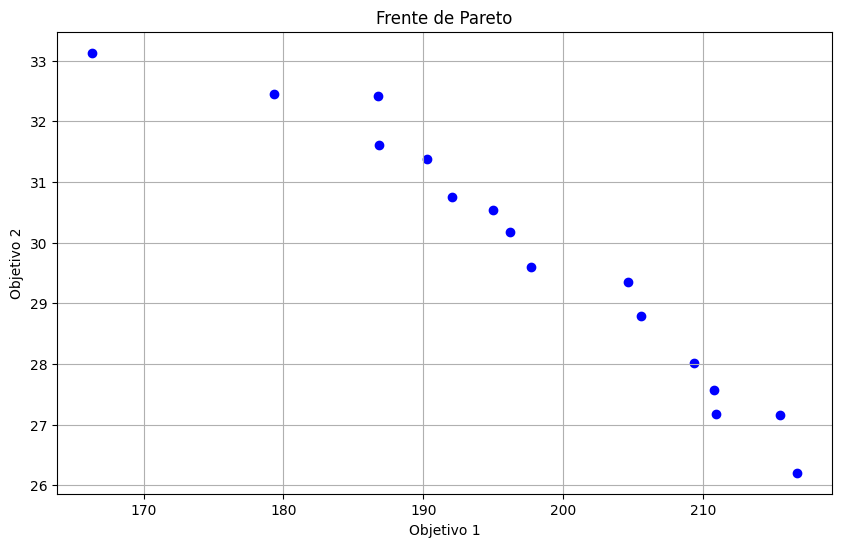

In [5]:
es2 = MOGA(graph, N=100, init=0.5, pcross=0.55, pmut=0.4, n_iter=500, fitness_metrics=0, n_tour = 2, crossover_op=2, sigma=0.7, show_plot=499)
pop2, old_fitness2, pareto2 = es.evolve()

In [ ]:
# Save results with pickle
with open('data\\moga_results\\pop2_list.pkl', 'wb') as file_pop:
    pickle.dump(pop2, file_pop)

with open('data\\moga_results\\fitness2_list.pkl', 'wb') as file_fitness:
    pickle.dump(old_fitness2, file_fitness)

with open('data\\moga_results\\pareto2_list.pkl', 'wb') as file_pareto:
    pickle.dump(pareto2, file_pareto)

### Retrieve saved data

In [ ]:
# Read results with pickle
with open('data\\moga_results\\pop2_list.pkl', 'rb') as file_pop:
    pop2 = pickle.load(file_pop)

with open('data\\moga_results\\fitness2_list.pkl', 'rb') as file_fitness:
    old_fitness2 = pickle.load(file_fitness)

with open('data\\moga_results\\pareto2_list.pkl', 'rb') as file_pareto:
    pareto2 = pickle.load(file_pareto)

## Comparacion de frentes de pareto con ground truth

##### Adjusted Mutual Information (AMI):

Adjusted Mutual Information between two clusterings.

Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings
and
, the AMI is given as:

AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]

This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching
(label_true) with (labels_pred) will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

In [ ]:
# Adjusted Mutual Information (AMI)
"""
The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). 
Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative. 
The value is in adjusted nats (based on the natural logarithm).
"""

from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y_true, y_pred)

##### Adjusted Rand Index (ARI)

Although often used to compare individual pairs of nodes, ARI can be a good measure for the overall similarity of two clusterings. It adjusts for the chance grouping of elements and can be applied to the entire network.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). The adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

In [ ]:
# Adjusted Rand Index (ARI)
"""
Similarity score between -0.5 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match. So we normalize it to [0, 1] by adding 0.5.
"""
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y_true, y_pred) + 0.5 / 1.5 #To normalize

##### Comparacion

In [5]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

# Format Ground truth graph
y_true = [-1] * len(graph._node)
for n in graph.nodes():
    y_true[n] = graph._node[n]['community']

In [6]:
#NSGA-II

results = [] # (pareto, AMI, ARI)

# Format Predicted graph
for p in pareto:
    cluster_representation = es.decode(pop[p])
    y_pred = [-1] * len(graph._node)
    for idx, community in enumerate(cluster_representation):
        for node in community:
            y_pred[node] = idx

    ami = adjusted_mutual_info_score(y_true, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    results.append((p, ami, ari))

results

[(0, 0.28919949468164186, 0.025011101677208006),
 (1, 0.29575968799479474, 0.027694269162273615),
 (2, 0.2992650441398265, 0.025821591597770827),
 (3, 0.30883940926125963, 0.03015660852896295),
 (4, 0.2983089467494973, 0.027780650876724856),
 (6, 0.3245258627438793, 0.034447708428422694),
 (83, 0.32744613972468095, 0.0342949704634965),
 (108, 0.3116787535248589, 0.03220130931188774)]

In [ ]:
#MOGA

results2 = [] # (pareto, AMI, ARI)

# Format Predicted graph
for p in pareto2:
    cluster_representation = es.decode(pop2[p])
    y_pred = [-1] * len(graph._node)
    for idx, community in enumerate(cluster_representation):
        for node in community:
            y_pred[node] = idx

    ami = adjusted_mutual_info_score(y_true, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    results2.append((p, ami, ari))

results2

### Plot de una solucion

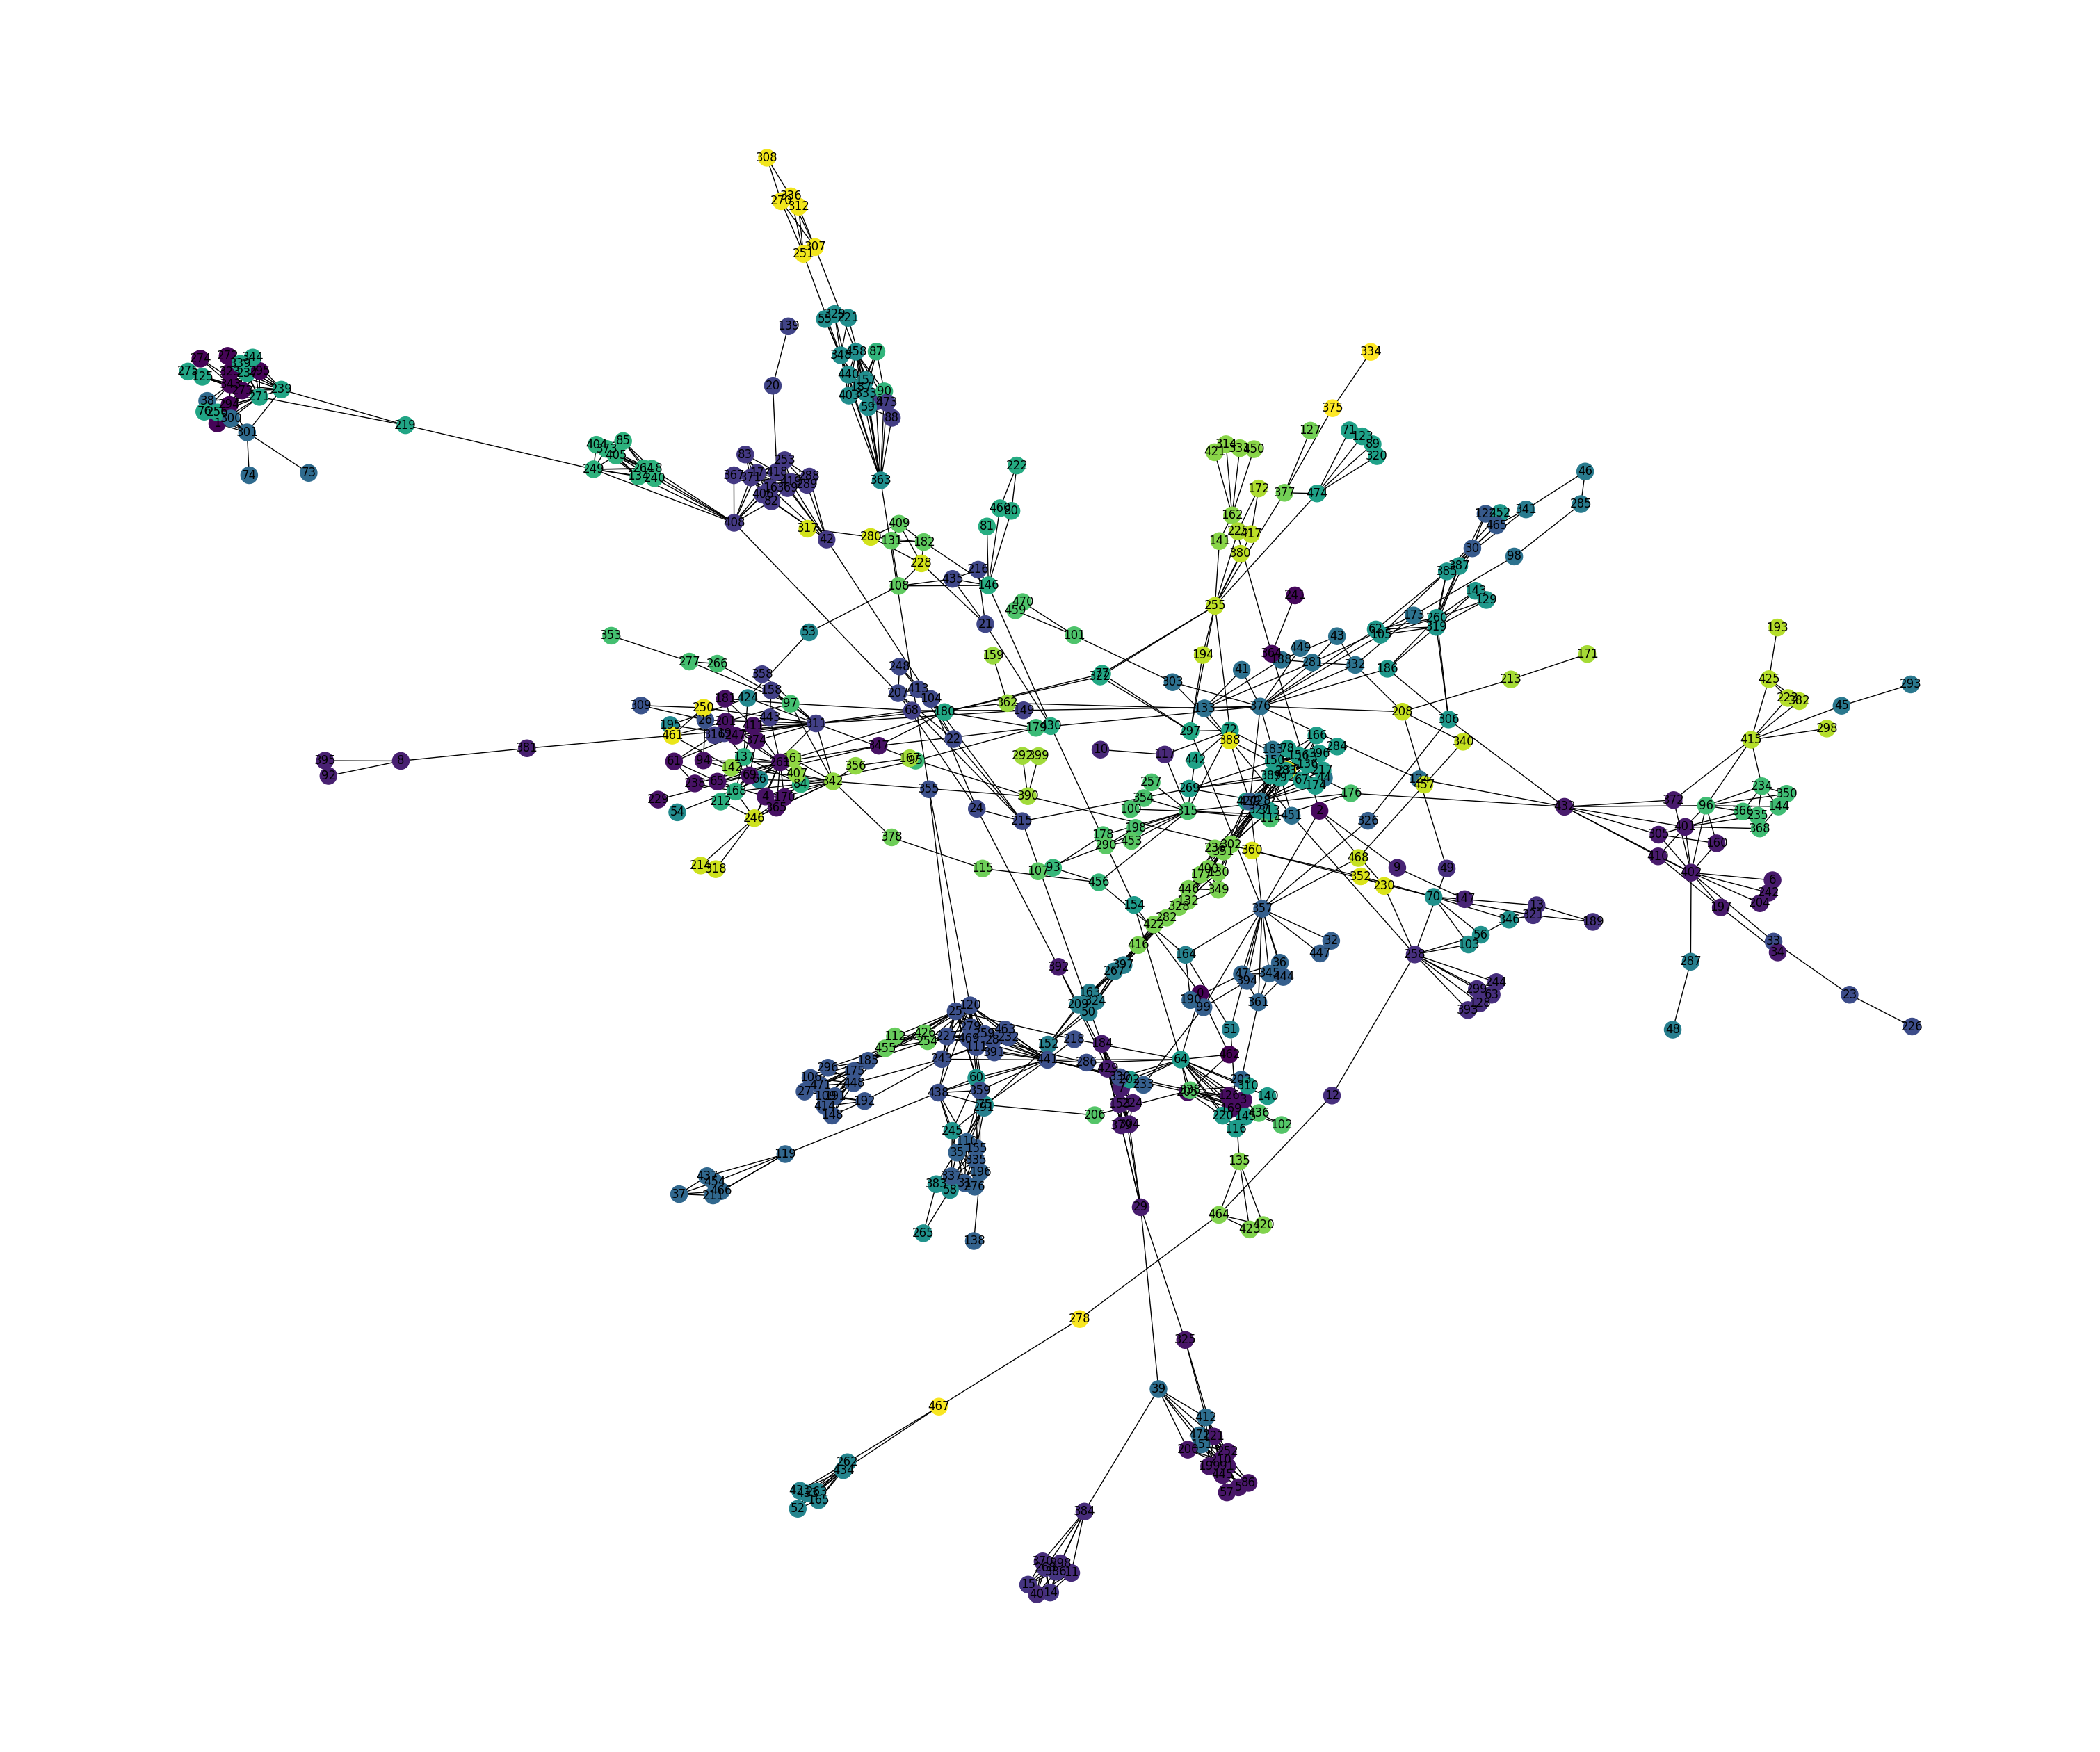

In [10]:
decoded = es.decode(pop[pareto[0]])
es.plot(decoded)

### Plot con ground truth

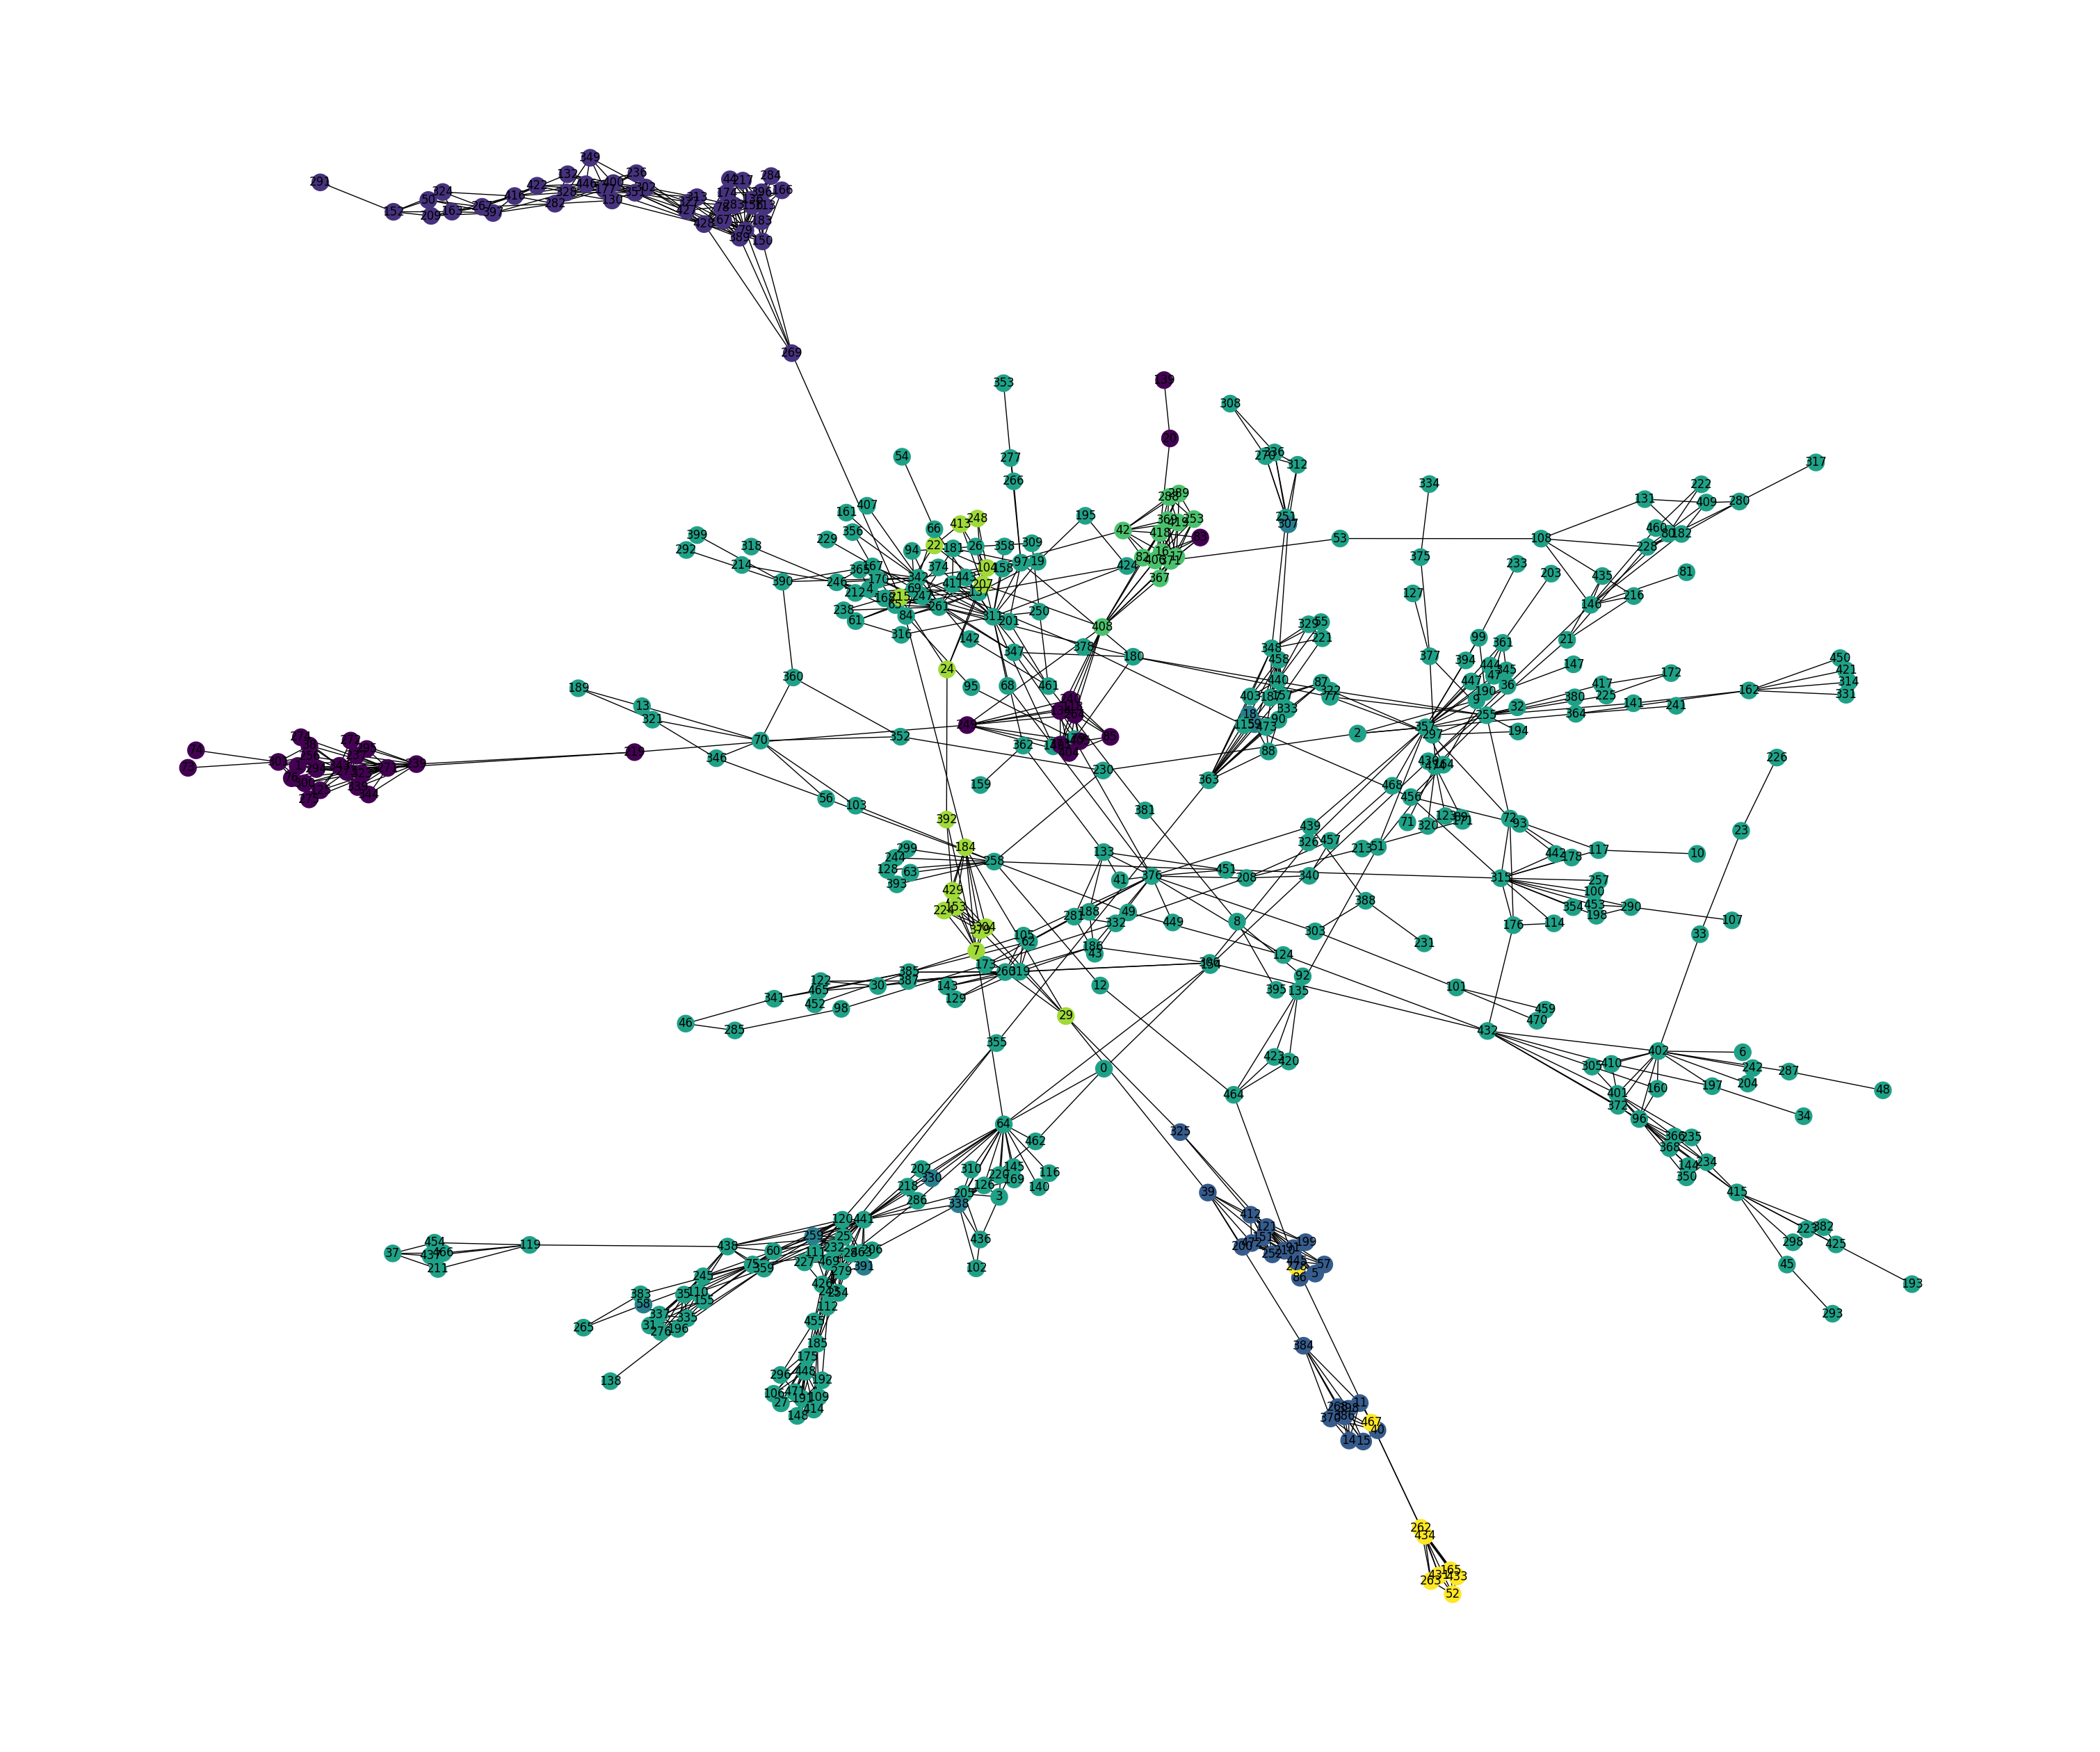

In [6]:
plt.figure(figsize=(30, 25))
nx.draw(graph, node_color=[data['community'] for _, data in graph.nodes(data=True)], with_labels=True)
plt.show()